In [2]:
from numpy import *
from matplotlib.pyplot  import *
import statsmodels.api as sm

In [22]:
from sklearn.linear_model import LinearRegression
from pandas import read_csv
import pandas as pd

from fredapi import Fred
fred = Fred(api_key='2b38d431367cd263936ede06a36022b7')
import eurostat

from matplotlib.dates import DateFormatter


model = LinearRegression()

# Figura 1

In [77]:
US_income = fred.get_series('DSPI')
y = log(US_income.loc['2018':'2019'])
x = array(range(1,len(y)+1)).reshape((-1, 1))
y1 =  log(US_income['2018':])
x1 = array(range(1,len(y1)+1)).reshape((-1, 1))

In [78]:
m = model.fit(x,y)

In [79]:
a,b=(model.intercept_,model.coef_)
ey = a + b *x1

In [80]:
ey = ey.flatten()
ey = pd.Series(ey,index = y1.index)

In [81]:
US_sav = fred.get_series('PMSAVE')

In [82]:
ys = US_sav.loc['2017':'2019']
xs = array(range(1,len(ys)+1)).reshape((-1, 1))
y1s = US_sav['2017':]
x1s = array(range(1,len(y1s)+1)).reshape((-1, 1))

In [83]:
m = model.fit(xs,ys)

In [84]:
a,b=(model.intercept_,model.coef_)
eys = a + b *x1s

In [85]:
eys = eys.flatten()
eys = pd.Series(eys,index = y1s.index)

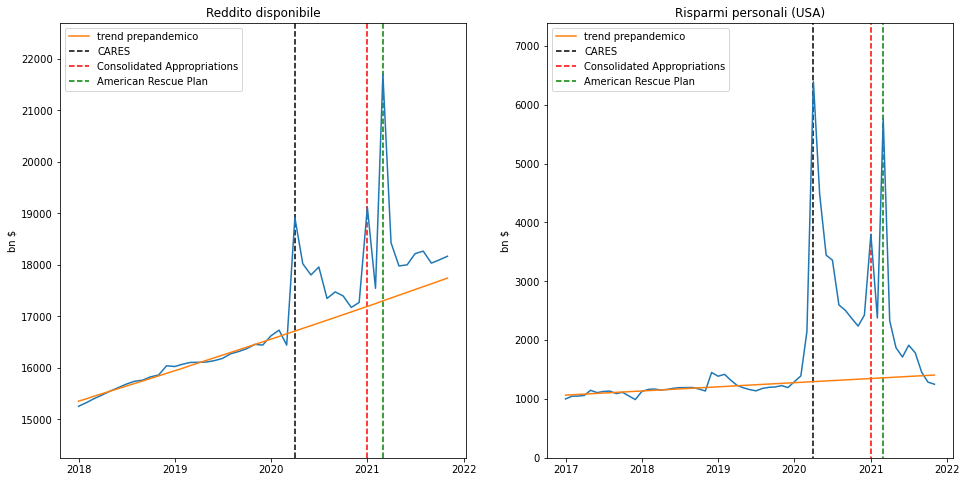

In [86]:
x = figure(figsize = (16,8))
x = subplot(121)

x = plot(exp(y1))
x = plot(exp(ey),label = 'trend prepandemico')#'prepandemic trend')#
x = vlines(pd.Timestamp('2020-04-01 00:00:00'),
       US_income.loc['2018':'2021'].min()-1000,
       US_income.loc['2018':'2021'].max() + 1000,ls = '--',color = 'k',label = 'CARES')
x = vlines(pd.Timestamp('2021-01-01 00:00:00'),
       US_income.loc['2018':'2021'].min()-1000,
       US_income.loc['2018':'2021'].max() + 1000,ls = '--',color = 'r',label = 'Consolidated Appropriations')
x = vlines(pd.Timestamp('2021-03-01 00:00:00'),
       US_income.loc['2018':'2021'].min()-1000,
       US_income.loc['2018':'2021'].max() + 1000,ls = '--',color = 'g',label = 'American Rescue Plan')
x = ylabel(r'bn \$')
x = title('Reddito disponibile')#('Disposable personal income (USA)')
x = ylim(US_income.loc['2018':'2021'].min() - 1000,US_income.loc['2018':'2021'].max() + 1000)
x = legend(loc = 2)
myFmt = DateFormatter("%Y")
x= gca().xaxis.set_major_formatter(myFmt)
x = xticks(['2018','2019','2020','2021','2022'])


#xticks(rotation = 90)
#figure(figsize = (8,8))
subplot(122)
plot(y1s)
plot(eys,label = 'trend prepandemico')#'prepandemic trend') # 
vlines(pd.Timestamp('2020-04-01 00:00:00'),
       US_sav.loc['2015':'2021'].min()-1000,
       US_sav.loc['2015':'2021'].max() + 1000,ls = '--',color = 'k',label = 'CARES')
vlines(pd.Timestamp('2021-01-01 00:00:00'),
       US_sav.loc['2015':'2021'].min()-1000,
       US_sav.loc['2015':'2021'].max() + 1000,ls = '--',color = 'r',label = 'Consolidated Appropriations')
vlines(pd.Timestamp('2021-03-01 00:00:00'),
       US_sav.loc['2015':'2021'].min()-1000,
       US_sav.loc['2015':'2021'].max() + 1000,ls = '--',color = 'g',label = 'American Rescue Plan')
x = ylabel(r'bn \$')
x = title('Risparmi personali (USA)')#('Personal saving (USA)')#
ylim(0,US_sav.loc['2015':'2021'].max() + 1000)
x = legend(loc = 2)
savefig('fig1.png')

# Figura 2

In [106]:
US_RGDP = fred.get_series('GDPC1')

In [107]:
y = log(US_RGDP.loc['2016':'2019'])
x = array(range(1,len(y)+1)).reshape((-1, 1))
y1 =  log(US_RGDP['2016':])
x1 = array(range(1,len(y1)+1)).reshape((-1, 1))

In [108]:
m = model.fit(x,y)

In [109]:
a,b=(model.intercept_,model.coef_)
ey = a + b *x1

In [110]:
ey = ey.flatten()
ey = pd.Series(ey,index = y1.index)

In [111]:
US_CPI = fred.get_series('CPIAUCSL')

In [112]:
yp = US_CPI.loc['2018':'2019']
xp = array(range(1,len(yp)+1)).reshape((-1, 1))
y1p = US_CPI['2018':]
x1p = array(range(1,len(y1p)+1)).reshape((-1, 1))

In [113]:
m = model.fit(xp,yp)

In [114]:
a,b=(model.intercept_,model.coef_)
eyp = a + b *x1p

In [115]:
eyp = eyp.flatten()
eyp = pd.Series(eyp,index = y1p.index)

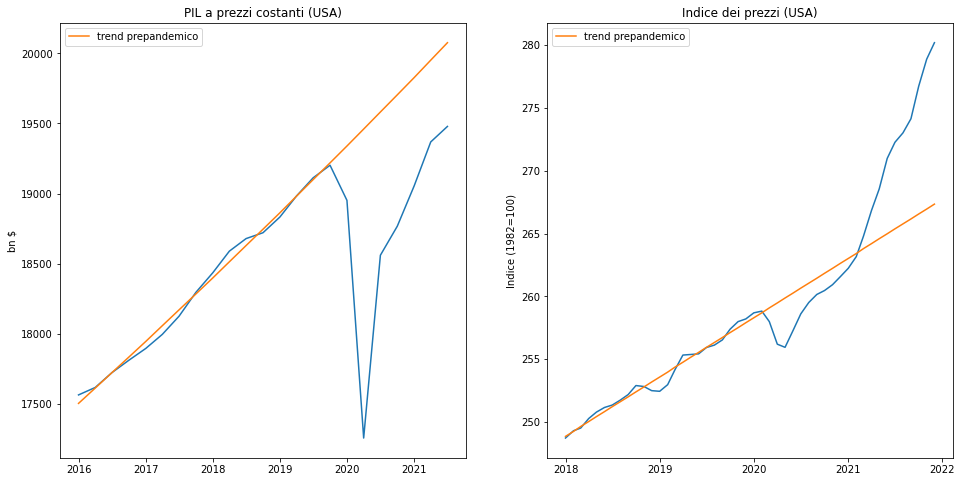

In [117]:
figure(figsize=(16,8))

subplot(121)
plot(exp(y1))
plot(exp(ey), label ='trend prepandemico') #'prepandemic trend')# 
ylabel(r'bn \$')
title('PIL a prezzi costanti (USA)')#('Real GDP (USA)')
x = legend()

subplot(122)
plot(y1p)
plot(eyp, label ='trend prepandemico')
ylabel('Indice (1982=100)')#('Index (1982=100)')
myFmt = DateFormatter("%Y")
x= gca().xaxis.set_major_formatter(myFmt)
x = xticks(['2018','2019','2020','2021','2022'])
x = title('Indice dei prezzi (USA)')#('CPI (USA)')
x = legend()
savefig('fig2.png')

# Figura 3

In [129]:
CN_exp = fred.get_series('XTEXVA01CNM667S')


In [130]:
y = CN_exp.loc['2016-01-01':'2019']
x = array(range(1,len(y)+1)).reshape((-1, 1))
y1 = CN_exp['2016-01-01':]
x1 = array(range(1,len(y1)+1)).reshape((-1, 1))

In [131]:
m = model.fit(x,y)

In [132]:
a,b=(model.intercept_,model.coef_)
ey = a + b *x1

In [133]:
ey = ey.flatten()
ey = pd.Series(ey,index = y1.index)

In [134]:
CN_gdp = pd.read_csv('CN_real_gdp.txt',header=None, sep = ' ',index_col=0)

In [135]:
yg = CN_gdp.loc['2015':'2019']
xg = array(range(1,len(yg)+1)).reshape((-1, 1))
y1g = CN_gdp.loc['2015':]
x1g = array(range(1,len(y1g)+1)).reshape((-1, 1))

In [136]:
m = model.fit(xg,yg)

In [137]:
a,b=(model.intercept_,model.coef_)
eyg = a + b *x1g

In [138]:
eyg = eyg.flatten()
eyg = pd.Series(eyg,index = y1g.index)

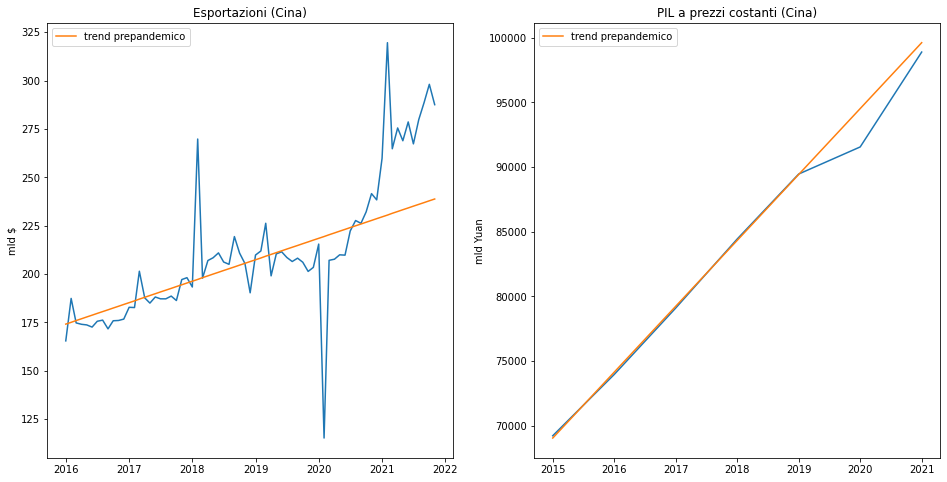

In [140]:
#xticks(rotation = 90)
figure(figsize = (16,8))
subplot(121)
plot(y1/1e9)
plot(ey/1e9, label ='trend prepandemico')#= 'prepandemic trend')
ylabel('mld $')#('bn $')
x = title('Esportazioni (Cina)')#('Exports (China)')#
x = legend()

subplot(122)
plot(y1g)
plot(eyg, label = 'trend prepandemico')#label ='prepandemic trend')#
ylabel('mld Yuan')#('bn Yuan')#
x = title('PIL a prezzi costanti (Cina)')#('Real GDP (China)')#
x = legend()
savefig('fig3.png')

# Figura 4

In [141]:
US_ls = fred.get_series('CLF16OV')

In [142]:
y = US_ls.loc['2017':'2019']
x = array(range(1,len(y)+1)).reshape((-1, 1))
y1 = US_ls['2017':]
x1 = array(range(1,len(y1)+1)).reshape((-1, 1))

In [143]:
m = model.fit(x,y)

In [144]:
a,b=(model.intercept_,model.coef_)
ey = a + b *x1

In [145]:
ey = ey.flatten()
ey = pd.Series(ey,index = y1.index)

In [149]:
EU_data = eurostat.get_data_df('lfsq_agan', flags=False) 

In [150]:
cond = ((EU_data['unit'] =='THS') & 
        (EU_data[r'geo\time'] == 'EU27_2020') &
        (EU_data[r'age'] == 'Y_GE15') &
        (EU_data[r'sex'] == 'T')&
        (EU_data[r'citizen'] == 'TOTAL')
       )


In [151]:
EU_LF = EU_data[cond].T[5:]
EU_LF = EU_LF.iloc[::-1]


In [153]:
tsmod = sm.tsa.UnobservedComponents(array(EU_LF['2015Q1':'2019Q4'],dtype = float),
                                    level='local linear trend',
                                    season = 4,
                                    freq_seasonal=[{'period':4,
                                                    'harmonics': 2}])
res_f = tsmod.fit(disp=False)
#print(res_f.summary())
# The first state variable holds our estimate of the intercept
#print("fixed intercept estimated as {0:.3f}".format(res_f.smoother_results.smoothed_state[0,-1:][0]))

#fig = Figure(figsize = (16,12))
#res_f.plot_components(fig = fig,figsize = (16,12))

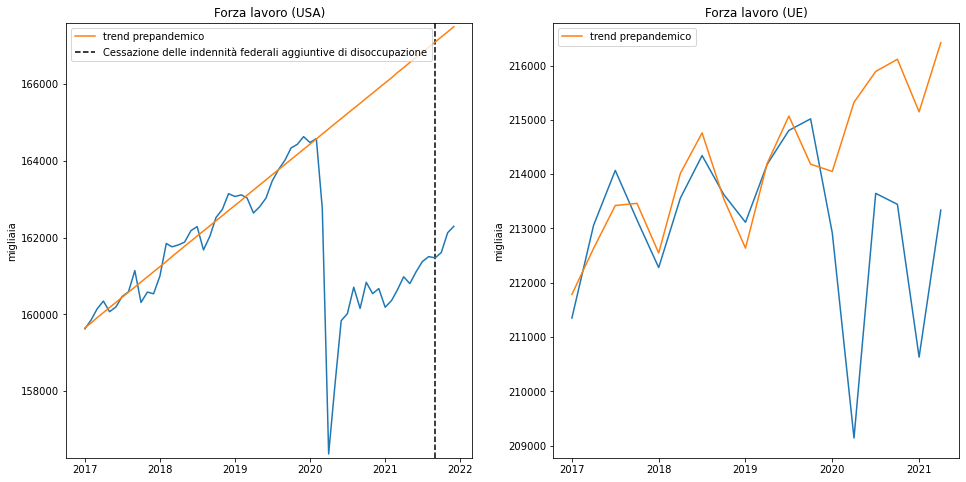

In [156]:
#xticks(rotation = 90)
figure(figsize=(16,8))
subplot(121)
plot(y1)
plot(ey, label = 'trend prepandemico')#'prepandemic trend')#
ylabel('migliaia')#('thousands')#
vlines(pd.Timestamp('2021-09-01 00:00:00'),
       y1.min()-100,
       ey.max() + 100,ls = '--',color = 'black',
       label = r'Cessazione delle indennità federali aggiuntive di disoccupazione')#'end of pandemic unemployment benefit') #
x = title('Forza lavoro (USA)')#('Labor supply (USA)')#
ylim( y1.min()-100,ey.max() + 100)
x = legend(loc = 2)

subplot(122)
yeu = EU_LF['2017Q1':'2021Q2']
eyeu = append(res_f.predict(8),res_f.forecast(6))
plot(yeu)
plot(eyeu, label = 'trend prepandemico')#'prepandemic trend')#
title('Forza lavoro (UE)')#('Labor supply (UE)')#
xticks(ticks = range(0,20,4), labels = ['2017','2018','2019','2020','2021'] )
ylabel('migliaia')#('thousands')
x = legend()
savefig('fig4.png')

# Figura 5

In [157]:
US_C = fred.get_series('PCEC96')


In [158]:
y = US_C.loc['2015':'2019']
x = array(range(1,len(y)+1)).reshape((-1, 1))
y1 = US_C['2015':]
x1 = array(range(1,len(y1)+1)).reshape((-1, 1))

In [159]:
m = model.fit(x,y)

In [160]:
a,b=(model.intercept_,model.coef_)
ey = a + b *x1

In [161]:
ey = ey.flatten()
ey = pd.Series(ey,index = y1.index)

In [163]:
EU_hh_data = eurostat.get_data_df('namq_10_fcs', flags=False)

In [164]:
#P31_S14 	Final consumption expenditure of households 
cond = ((EU_hh_data['unit'] =='CLV15_MEUR') & 
        (EU_hh_data['na_item'] == 'P31_S14' ) &
        (EU_hh_data[r'geo\time'] != 'IS') &
        (EU_hh_data[r'geo\time'] != 'NO') &
                (EU_hh_data[r'geo\time'] != 'CH') &
        (EU_hh_data[r'geo\time'] != 'UK') &
        (EU_hh_data[r'geo\time'] != 'RS') &
        (EU_hh_data[r'geo\time'] != 'TR') &
        (EU_hh_data[r'geo\time'] != 'BA') &
        (EU_hh_data[r's_adj'] == 'SCA'))



In [175]:
EU_hh_data[cond].T[5:]

,1794,1796,1797,1799,1800,1801,1802,1803,1804,1805,...,1813,1814,1815,1816,1818,1819,1820,1822,1823,1824
2021Q2,43289.6,52596.0,8661.3,22036.6,383685.6,35102.4,3053.6,32204.4,156464.0,28516.0,...,4923.4,3701.9,1387.4,78324.8,74193.2,31792.2,32040.6,54673.5,5997.3,12437.1
2021Q1,38266.2,50861.0,8681.4,20436.7,370523.6,33320.7,2986.2,30805.9,148872.0,27882.0,...,4781.5,3649.9,1446.5,72948.7,74183.4,29530.9,31957.4,54151.0,5785.9,11542.5
2020Q4,42028.0,49808.0,8339.3,20432.0,391682.2,34841.7,2929.1,29186.9,152609.0,27936.0,...,4615.2,3739.9,1454.6,75251.0,71585.2,31294.4,31475.3,53090.9,5559.6,11943.6
2020Q3,45873.6,53671.0,8018.2,21664.7,398837.1,34410.1,2876.0,27982.3,154484.0,28109.0,...,4981.3,3834.1,1327.5,79230.6,74263.5,31196.1,31536.1,52875.4,6127.6,12395.9
2020Q2,39970.6,45990.0,7791.1,20401.4,362565.3,32217.4,2700.5,26920.1,126062.0,26074.0,...,4179.8,3201.9,1162.7,71285.8,65412.5,26259.1,28115.6,50742.3,5094.0,11694.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
EU_C_hh = EU_hh_data[cond].T[5:]
EU_C_hh = EU_C_hh.iloc[::-1]
EU_C_hh = EU_C_hh.sum(1)

In [166]:
yeu = EU_C_hh.loc['2018Q1':'2019Q4']
xeu = array(range(1,len(yeu)+1)).reshape((-1, 1))
y1eu =  EU_C_hh['2018Q1':]
x1eu = array(range(1,len(y1eu)+1)).reshape((-1, 1))

In [167]:
m = model.fit(xeu,yeu)
a,b=(model.intercept_,model.coef_)

In [168]:
eyeu = a + b *x1eu

In [170]:
eyeu = eyeu.flatten()
eyeu = pd.DataFrame(eyeu,index = y1eu.index)

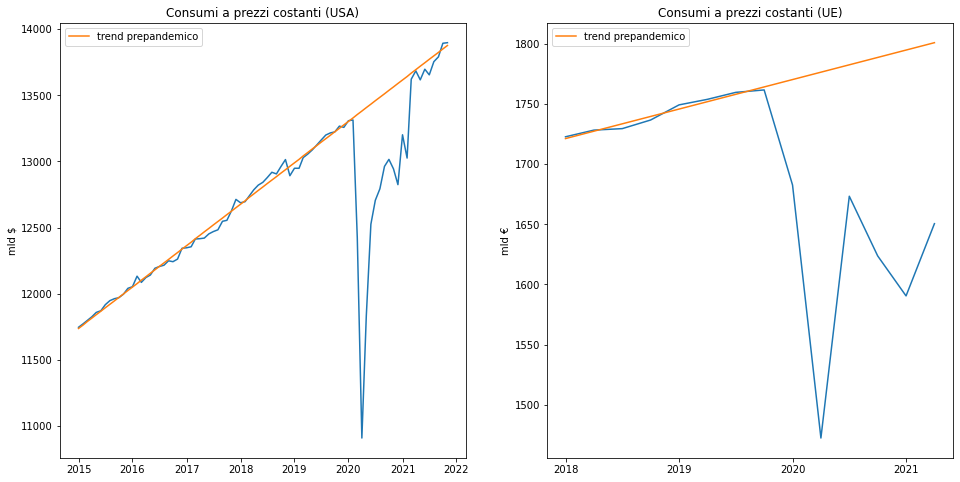

In [177]:
figure(figsize=(16,8))
subplot(121)
plot(y1)
plot(ey, label = 'trend prepandemico')#'prepandemic trend')#
title('Consumi a prezzi costanti (USA)')#('Real consumption (USA)')#
x = ylabel('mld \$')#x = ylabel('bn \$')#
legend()

subplot(122)
plot(y1eu/1e3)
plot(eyeu/1e3, label = 'trend prepandemico')#'prepandemic trend')#
xticks(ticks = range(0,14,4), labels = ['2018','2019','2020','2021'] )
legend()
title('Consumi a prezzi costanti (UE)')#('Real consumption (EU)')#
x = ylabel(r'mld €')# (r'bn €')#
savefig('fig5.png')